# Dealing with Categorical Variables

## Introduction

We now understand the intuition behind multiple linear regression. Great! However, because we'll start digging into bigger data sets with more predictors, we'll come across predictors that are slightly different from what we've seen before. Welcome to the wonderous world of categorical variables!

## Objectives
You will be able to:
* Understand what categorical variables are
* Understand the need to create dummy variables for categorical predictors 
* Use Pandas to create dummy variables

## The auto-mpg data

In this section, we'll use the auto-mpg data to illustrate several elements of multiple linear regression. The auto-mpg data set contains technical specifications of cars. This data set is often used by aspiring data scientists who want to practice linear regression with multiple predictors. Generally, the `mpg` column (for "mileage per gallion") is the dependent variable, and what we want to know is how the other columns ("predictors") in the data set affect the mpg. Let's have a look at the data:

In [99]:
## import numpy as np
import pandas as pd
data = pd.read_csv("auto-mpg.csv")
data['horsepower'].astype(str).astype(int) # don't worry about this for now
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.6+ KB


Except for "car name", every other column seems to be a candidate predictor for miles per gallon. 

## What are categorical variables?
Now let's take a closer look at the column "origin". 

In [101]:
print(data["origin"].describe())

count    392.000000
mean       1.576531
std        0.805518
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: origin, dtype: float64


In [102]:
print(data["origin"].nunique())

3


Values range from 1 to 3, moreover, actually the only values that are in the dataset are 1, 2 and 3! it turns out that "origin" is a so-called **categorical** variable. It does not represent a continuous number but an actual origin - say a may stand for US, 2 for Europe, 3 for Asia (note: for this data set the actual meaning is not disclosed).

So, categorical variables are exactly what they sound like: they represent categories instead of numerical features. 
Note that, even though that's not the case here, these features are often stored as text values which represent various levels of the observations. An example of this is gender: it can be described as "M" ("Male") or "F"("Female"), etc.

## Identifying categorical variables

As categorical variables need to be treated in a particular manner, as you'll see later on, you need to make sure to identify which variables are categorical. Note that this may not be trivial. A first thing you can do is use the `.describe()` function and `.info()`-function and get a better sense. `.describe()` will give you info on the data types (like strings, integers, etc), but even then continuous variables might have been imported as strings, so it's very important to really have a look at your data. This is illustrated in the scatter plots below.

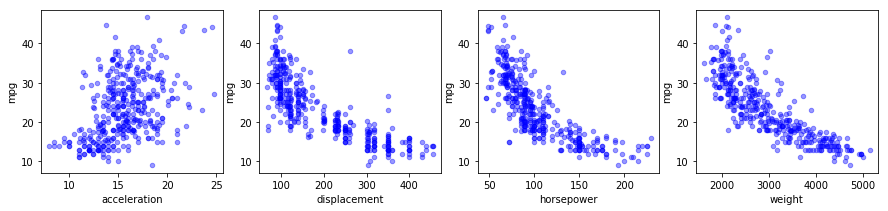

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,3))

for xcol, ax in zip(['acceleration', 'displacement', 'horsepower', 'weight'], axes):
    data.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.4, color='b')

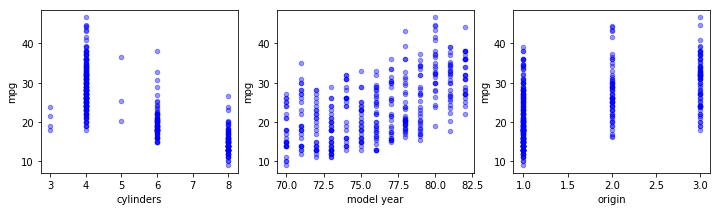

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

for xcol, ax in zip([ 'cylinders', 'model year', 'origin'], axes):
    data.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.4, color='b')

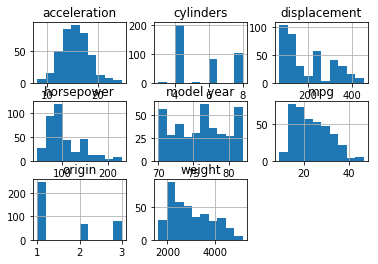

In [45]:
data.hist();

In [49]:
data["model year"].nunique()

13

In [43]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.6+ KB


In [42]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
plt.scatter(data.index.tolist(),data["origin"])

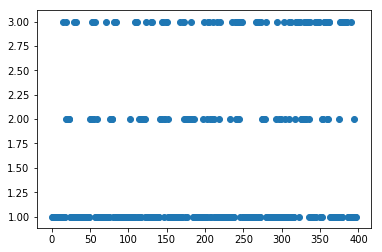

In [11]:
plt.scatter(data.index.tolist(),data["origin"])

In [ ]:
plt.scatter(data.index.tolist(),data["origin"])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## What are categorical variables?

## Objective 1 Title

In [ ]:
# Objective 1 content

## Objective 2 Title

In [ ]:
## Objective 2 content

## Objective 3 Title

In [ ]:
## Objective 3 content

## Summary
Summary goes here